In [1]:
import gpxo
%matplotlib inline

In [2]:
track = gpxo.Track('ExampleTrack.gpx')

# See all track data

In [3]:
track.data

,seconds,latitude,longitude,distance,velocity
time,,,,,
2020-02-27 12:24:25,0.0,45.76861,4.83880,0.000000,22.4028
2020-02-27 12:24:27,2.0,45.76861,4.83896,0.012446,22.4028
2020-02-27 12:24:29,4.0,45.76861,4.83912,0.024892,22.4028
2020-02-27 12:24:31,6.0,45.76861,4.83928,0.037338,22.4028
2020-02-27 12:24:33,8.0,45.76862,4.83943,0.049059,21.0978
...,...,...,...,...,...
2020-02-27 12:33:49,564.0,45.78088,4.86558,3.616242,25.8138
2020-02-27 12:33:51,566.0,45.78092,4.86576,3.630929,26.4366
2020-02-27 12:33:53,568.0,45.78096,4.86594,3.645616,26.4366


# Plots

<AxesSubplot:xlabel='distance'>

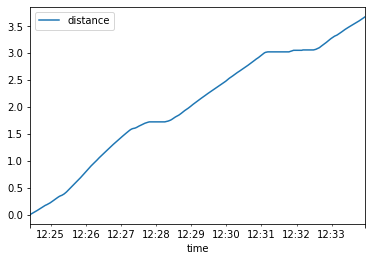

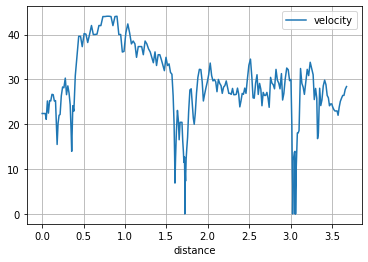

In [4]:
track.plot(y='distance')
track.plot(x='distance', y='velocity', grid=True)

# Smoothing

<AxesSubplot:xlabel='distance'>

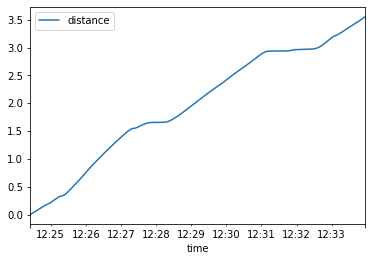

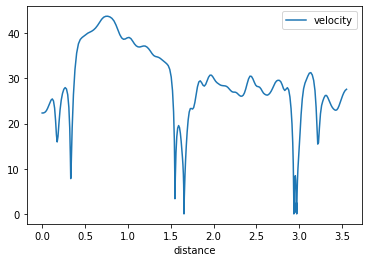

In [5]:
track.smooth()
track.plot(y='distance')
track.plot(x='distance', y='velocity')

# Plot path on map

Open map in a new window:

In [6]:
track.map()

Map type can be passed as an argument. Available maps (among others):
- `'osm'` for OpenStreetMap
- `'esri_aerial'` for satellite images
- `'esri_worldtopo'` for topographic map.

See https://github.com/jwass/mplleaflet/blob/master/mplleaflet/maptiles.py for other options

Embed map in Jupyter Notebook:

In [7]:
track.map(embed=True)

C:\Users\olivier.vincent\Anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


![title](map.png)